In [26]:
# UTKFace
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [27]:
import tensorflow as tf
from keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

# read the images in the dataset and store them in a dataframe with labels like age, gender and ethnicity
BASE_DIR = 'UTKFace/'
image_paths = []
age_labels = []
gender_labels = []

In [36]:
#create a loop for all dataset images
for filename in (os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    #get age from 0
    age = int(temp[0])
    #get gender from 1
    gender = int(temp[1])
    #append all
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

image_paths


['UTKFace/100_0_0_20170112213500903.jpg.chip.jpg',
 'UTKFace/100_0_0_20170112215240346.jpg.chip.jpg',
 'UTKFace/100_1_0_20170110183726390.jpg.chip.jpg',
 'UTKFace/100_1_0_20170112213001988.jpg.chip.jpg',
 'UTKFace/100_1_0_20170112213303693.jpg.chip.jpg',
 'UTKFace/100_1_0_20170112215032192.jpg.chip.jpg',
 'UTKFace/100_1_0_20170117195420803.jpg.chip.jpg',
 'UTKFace/100_1_0_20170119212053665.jpg.chip.jpg',
 'UTKFace/100_1_2_20170105174847679.jpg.chip.jpg',
 'UTKFace/100_1_2_20170112213615815.jpg.chip.jpg',
 'UTKFace/100_1_2_20170112222336458.jpg.chip.jpg',
 'UTKFace/101_0_0_20170112213500903.jpg.chip.jpg',
 'UTKFace/101_1_2_20170105174739309.jpg.chip.jpg',
 'UTKFace/103_0_2_20170112213001988.jpg.chip.jpg',
 'UTKFace/105_0_0_20170112213001988.jpg.chip.jpg',
 'UTKFace/105_1_0_20170112213001988.jpg.chip.jpg',
 'UTKFace/105_1_0_20170112213021902.jpg.chip.jpg',
 'UTKFace/105_1_0_20170112213507183.jpg.chip.jpg',
 'UTKFace/105_1_1_20170112213303693.jpg.chip.jpg',
 'UTKFace/10_0_0_20161220222308

In [37]:
# converting into dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,UTKFace/100_0_0_20170112213500903.jpg.chip.jpg,100,0
1,UTKFace/100_0_0_20170112215240346.jpg.chip.jpg,100,0
2,UTKFace/100_1_0_20170110183726390.jpg.chip.jpg,100,1
3,UTKFace/100_1_0_20170112213001988.jpg.chip.jpg,100,1
4,UTKFace/100_1_0_20170112213303693.jpg.chip.jpg,100,1


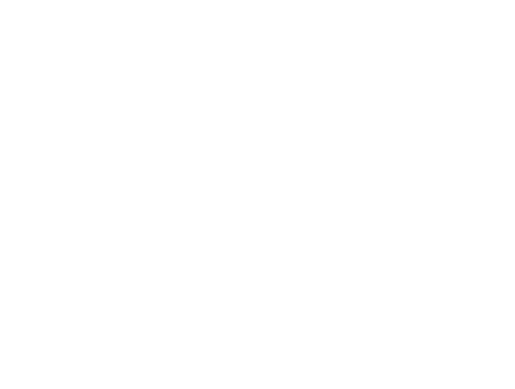

In [41]:
# changing the label of the gender into one-hot-code encoding
gender_dict = {0:'Male', 1:'Female'}
from PIL import Image
img = Image.open(df['image'][2])
plt.axis('off')
plt.show(img)

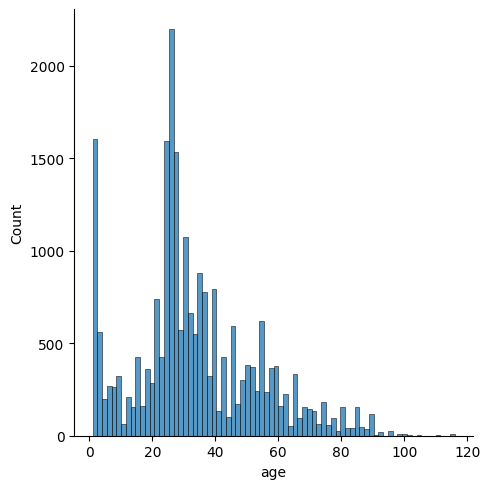

In [31]:
# check the age distribution
sns.displot(df['age'])

<Axes: ylabel='count'>

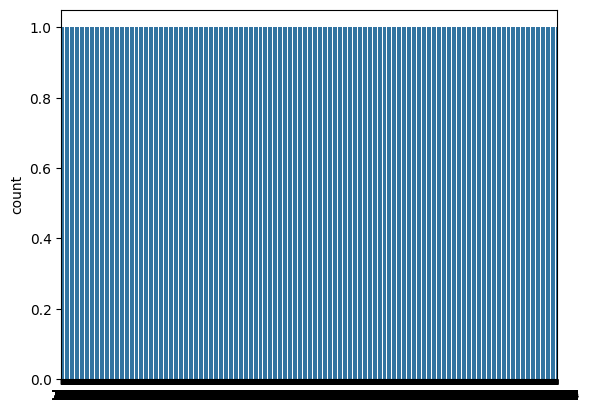

In [32]:
# Count plot of gender 
sns.countplot(df['gender'])

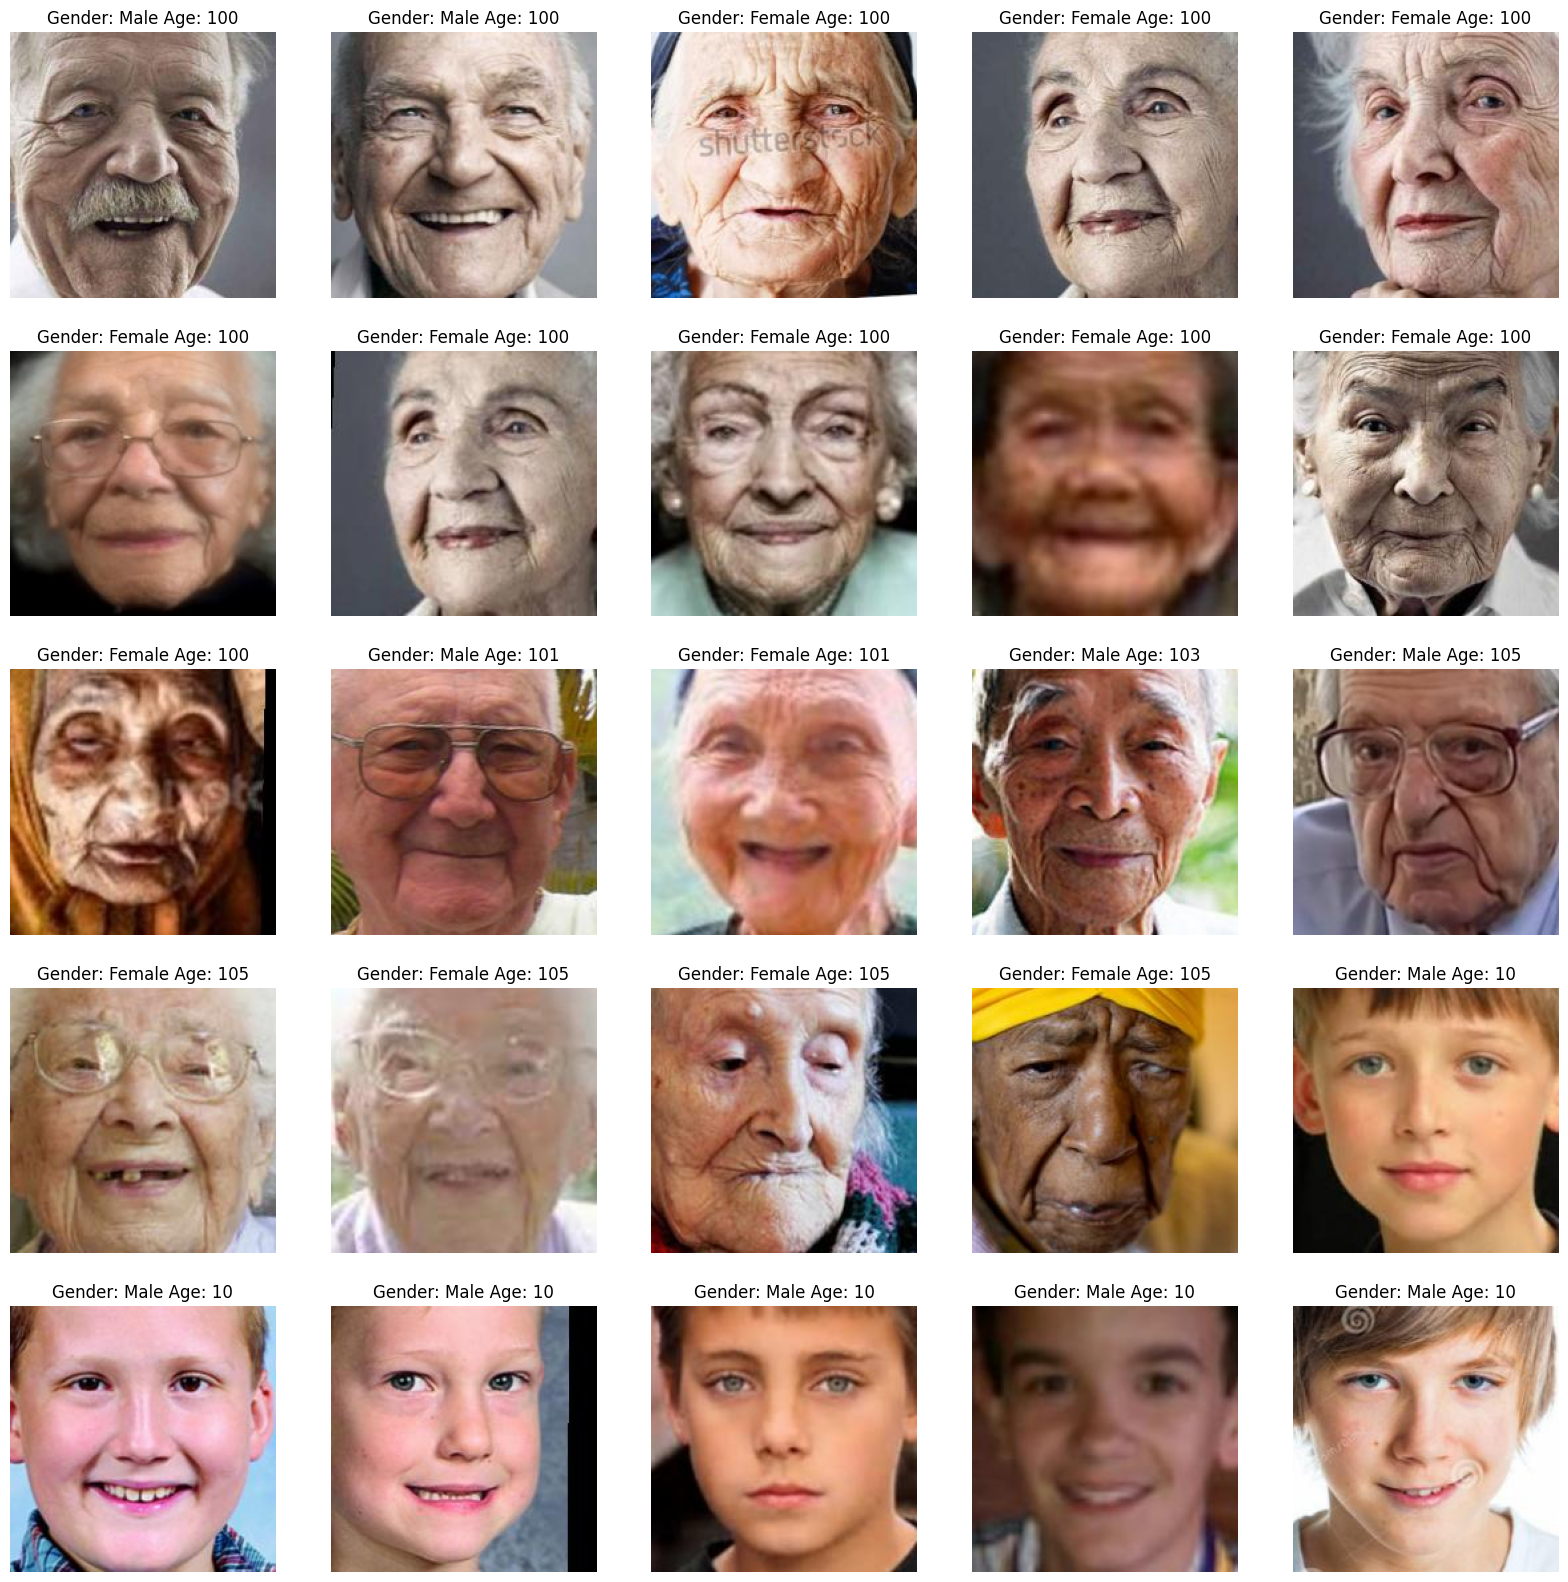

In [33]:
# other examples
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Gender: {gender_dict[gender]} Age: {age}")
    plt.axis('off')

In [34]:
# resize our images to 128*128 and make some adjustments
def extract_features(images):
    features = []
    for image in images:
        # change to gray image
        img = load_img(image, grayscale=True)
        #resize by 128*128
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features

X = extract_features(df['image'])
X.shape

AttributeError: module 'PIL.Image' has no attribute 'ANTIALIAS'

In [35]:
# making some normalisation 0-1
X = X/255.0

NameError: name 'X' is not defined

In [ ]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])
print(y_age)

In [ ]:
# creating a convolution model
#Create Model
input_shape = (128, 128, 1)
# declare input
inputs = Input((input_shape))
# Convolutional layers 1
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
# Convolutional layers 2
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
# Convolutional layers 3
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
# Convolutional layers 4
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)


flatten = Flatten() (maxp_4)

# Fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

# two outputs
output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)
model = Model(inputs=[inputs], outputs=[output_1, output_2])
model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

# plotting the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
# training the model with batch size is 32 and epoch is 30
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)
model.save("gender_age_detection_model.h5")

In [ ]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

#for loss function
loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [ ]:
# prediction for a randomly chosen image
image_index = 35
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])

# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray')
